# Importing

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Pre Processing

In [3]:
data = pd.read_csv('spam_dataset.csv')

X = data['text']  # Features - the email text
y = data['label_num']  # Target variable - spam or not spam

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
x_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)
    


# Default Model (No modified Parameters)

In [10]:
# Example of a basic logistic regression model
from sklearn.ensemble import RandomForestClassifier

basic_model = RandomForestClassifier(random_state=42)
#n_estimators = number of trees. more trees, generally more stability, but also more computer power 
#random_state = the randomness of the bootstrapping of the samples when building trees. doesn't impact performance. keep it at a number just makes sure the results are reproducible. 
basic_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Train/Tune Model


In [42]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

n_estimators = list(range(1, 130, 5)) # Number of trees in the forest
min_samples_split = list(range(2, 10)) # Minimum number of samples required to split an internal node
min_samples_leaf = list(range(1, 4)) # Minimum number of samples required to be at a leaf node
max_features = ['log2', 'sqrt']
max_depth = [None, 10, 20, 30]
bootstrap = [True, False]

param_grid = {
    'n_estimators':n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'max_features': max_features,
    'max_depth': max_depth,
    'bootstrap': bootstrap
}

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# You can also use the best estimator directly to make predictions
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)

Fitting 5 folds for each of 9984 candidates, totalling 49920 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 126}
Best Score: 0.982591755311381


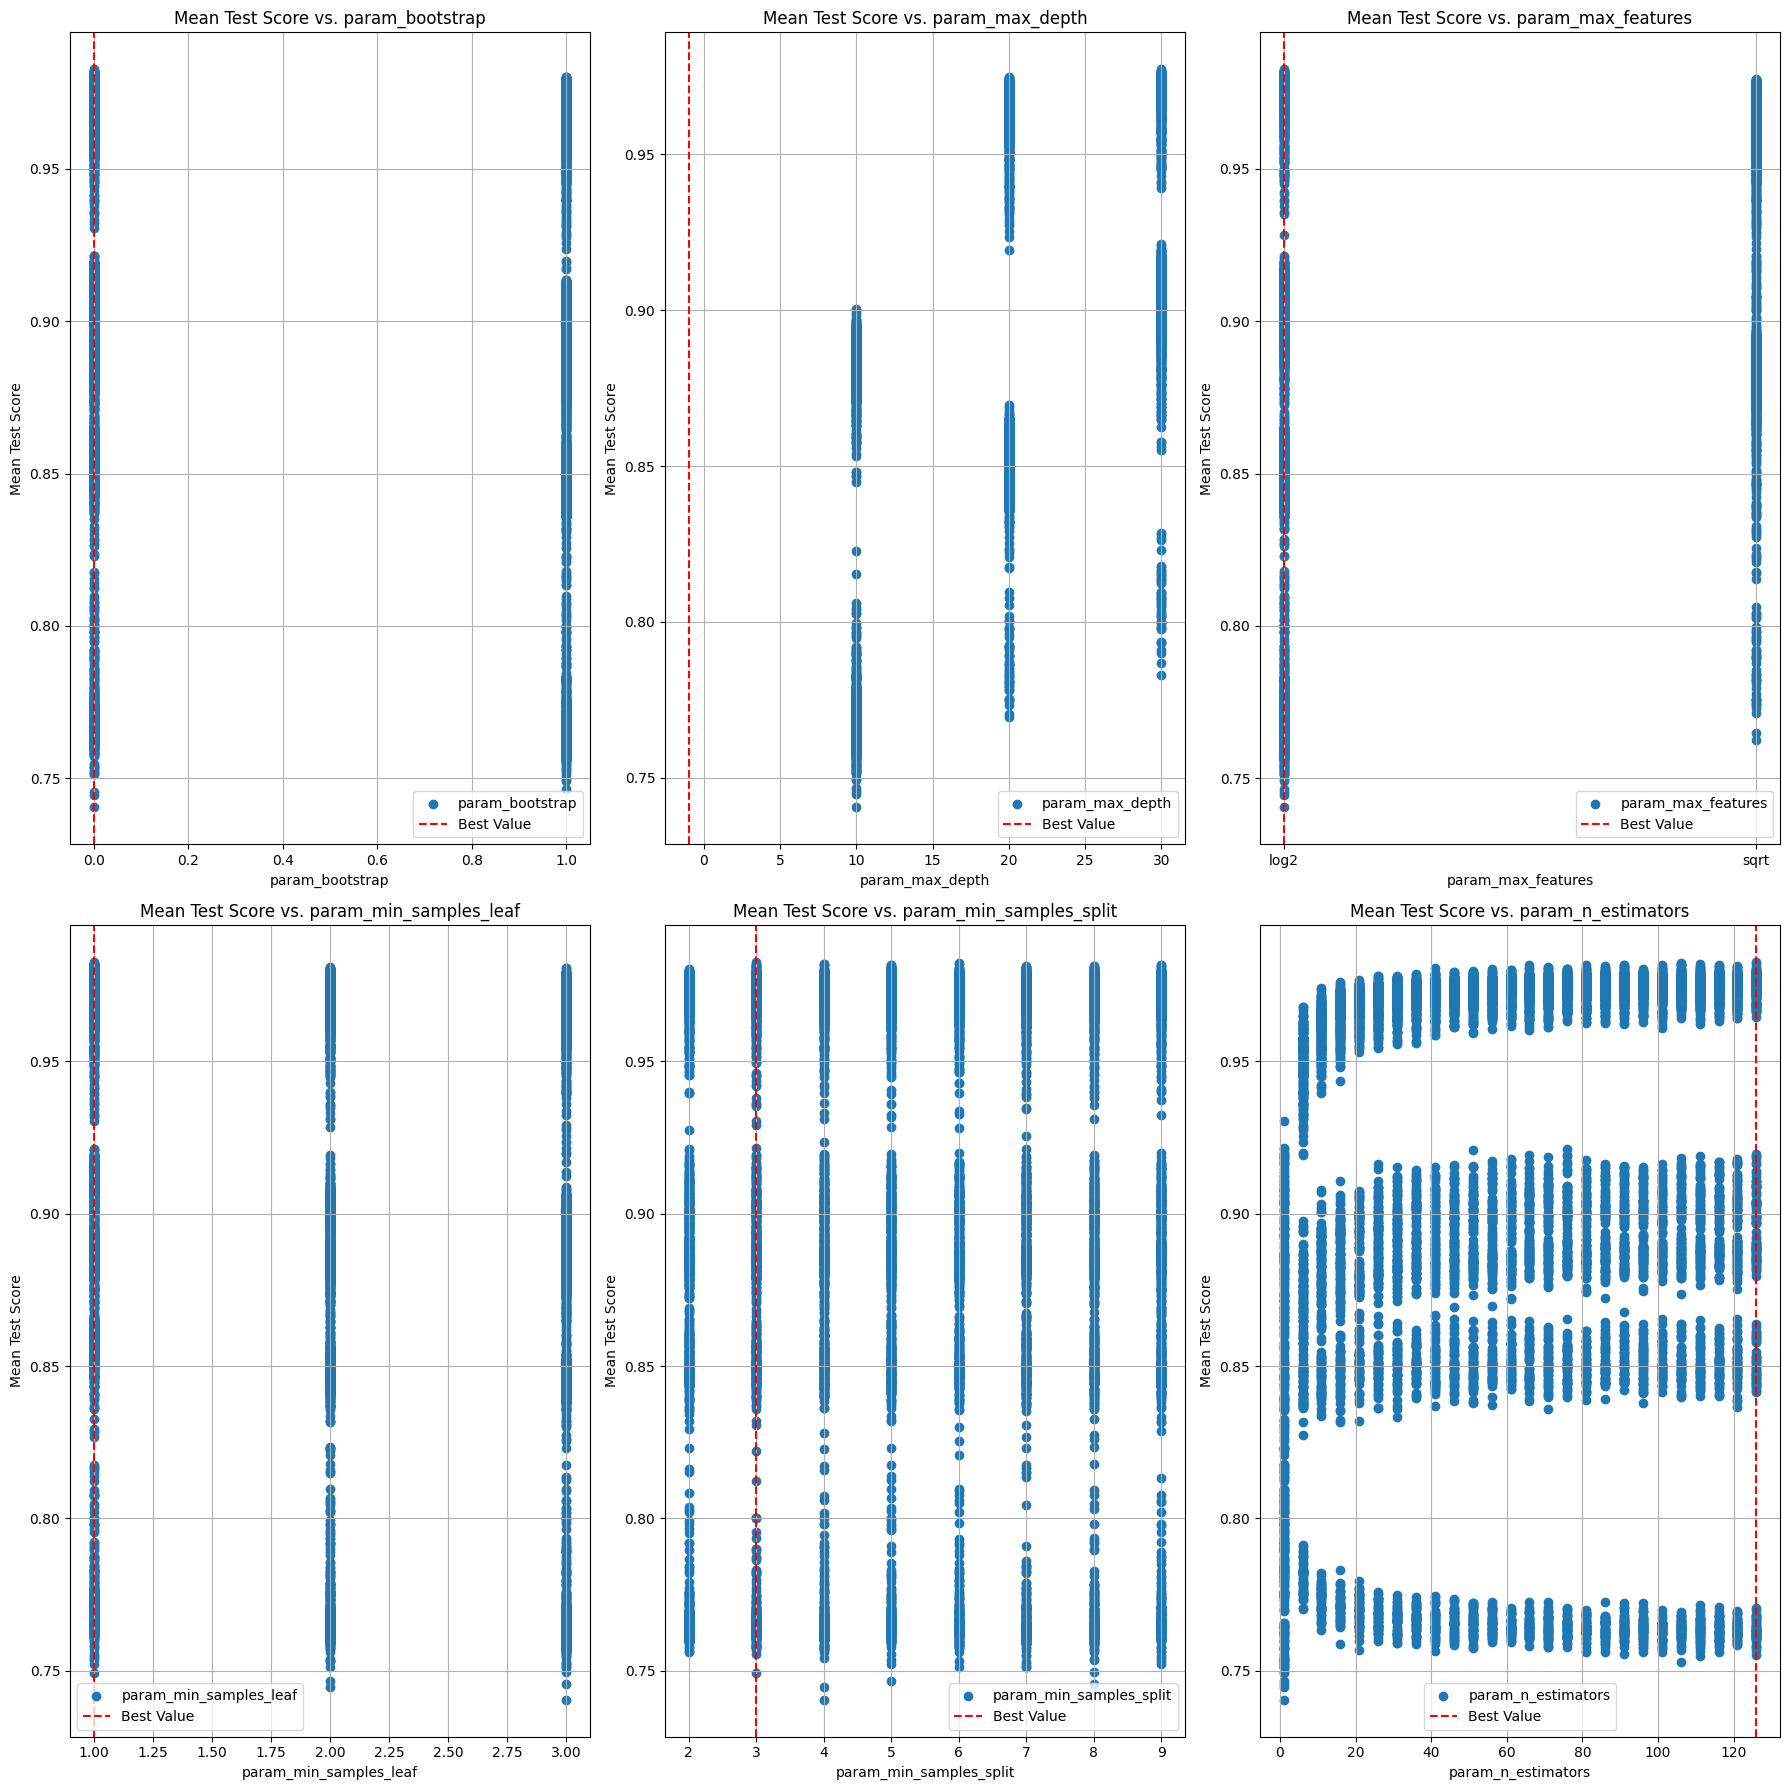

In [53]:
# Convert cv_results_ to DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Extract relevant columns
param_columns = [col for col in cv_results_df.columns if col.startswith("param_")]
mean_test_score = cv_results_df["mean_test_score"]

# Plot the data for each hyperparameter separately
fig, axes = plt.subplots(2, 3, figsize=(18, 18))

for i, param_col in enumerate(param_columns):
    row = i // 3
    col = i % 3
    
    ax = axes[row, col]
    # ax.plot(cv_results_df[param_col], mean_test_score, marker='o', label=param_col)
    ax.scatter(cv_results_df[param_col], mean_test_score, label=param_col)
    # Highlight the best value
    best_index = cv_results_df["mean_test_score"].idxmax()
    best_value = cv_results_df[param_col][best_index]
    if best_value == None: 
        best_value = -1
    ax.axvline(x=best_value, color='r', linestyle='--', label='Best Value')

    ax.set_xlabel(param_col)
    ax.set_ylabel("Mean Test Score")
    ax.set_title("Mean Test Score vs. " + param_col)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# Test Model

In [54]:
# zz insert model code here
best_model = RandomForestClassifier()
best_model.set_params(**grid_search.best_params_)
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=3, n_estimators=126)

# Evaluate

In [57]:
# Default Model:
basic_model_pred = basic_model.predict(X_test)

# # Calculate accuracy for the basic Logistic Regression model
basic_model_accuracy = accuracy_score(y_test, basic_model_pred)
basic_model_classification_report_text = classification_report(y_test, basic_model_pred)
print(f"Basic Model Accuracy: {basic_model_accuracy:.4f}")

# Tuned Model:
best_model_pred = best_model.predict(X_test)

# Calculate accuracy for the tuned Logistic Regression model
best_model_accuracy = accuracy_score(y_test, best_model_pred)
best_model_classification_report_text = classification_report(y_test, best_model_pred)
print(f"Tuned Model Accuracy: {best_model_accuracy:.4f}")

# Show improvement
print("\nImprovement in accuracy:")
print(f"zzModel: {best_model_accuracy - basic_model_accuracy:.4f}")


Basic Model Accuracy: 0.9807
Tuned Model Accuracy: 0.9845

Improvement in accuracy:
zzModel: 0.0039
